## Intro

In [ ]:
import pickle
import arviz as az
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes new/Data/df_balanced.csv')
df_reduced = pd.read_csv('/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes new/Data/df_reduced.csv')
print(df.shape)

print(df_reduced.shape)
col_removed = df.columns.difference(df_reduced.columns)
print(list(col_removed))

(1021, 29)
(1021, 19)
['AB0', 'Basofili_perc', 'Creatinina', 'DATA_NASCITA', 'Date', 'Emoglobina_conc_media_mchc', 'Ferritina', 'Ferro_totale', 'Rh', 'SESSO']


In [ ]:
path1 = '/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes new/Model_1/Model_1.pkl'
path3 = '/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes new/Model_3/Model_3.pkl'
path4 = '/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes new/Model_4/Model_4.pkl'
path5 = '/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes new/Model_5/Model_5.pkl'
path6 = '/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes new/Model_6/Model_6.pkl'
path7 = '/content/drive/MyDrive/Bayesian Statistics/BS Project/Codes/Report codes new/Model_7/Model_7.pkl'

with open(path1, 'rb') as f:
    model_1 = pickle.load(f)

with open(path3, 'rb') as f:
    model_3 = pickle.load(f)

with open(path4, 'rb') as f:
    model_4 = pickle.load(f)

with open(path5, 'rb') as f:
    model_5 = pickle.load(f)

with open(path6, 'rb') as f:
    model_6 = pickle.load(f)

with open(path7, 'rb') as f:
    model_7 = pickle.load(f)

In [ ]:
idata1 = az.from_cmdstanpy(
    posterior=model_1,
    log_likelihood="log_lik"
)
waic_1 = az.waic(idata1)

idata3 = az.from_cmdstanpy(
    posterior=model_3,
    log_likelihood="log_lik"
)
waic_3 = az.waic(idata3)

idata4 = az.from_cmdstanpy(
    posterior=model_4,
    log_likelihood="log_lik"
)
waic_4 = az.waic(idata4)

idata5 = az.from_cmdstanpy(
    posterior=model_5,
    log_likelihood="log_lik"
)
waic_5 = az.waic(idata5)

idata6 = az.from_cmdstanpy(
    posterior=model_6,
    log_likelihood="log_lik"
)
waic_6 = az.waic(idata6)

idata7 = az.from_cmdstanpy(
    posterior=model_7,
    log_likelihood="log_lik"
)
waic_7 = az.waic(idata7)

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimat

         rank     elpd_loo       p_loo   elpd_diff        weight         se  \
Model_3     0  5521.463091  271.709739    0.000000  9.149135e-01  76.506112   
Model_4     1  5502.184883  260.082997   19.278209  2.294752e-15  76.352789   
Model_1     2  5399.057403  199.236151  122.405688  8.508652e-02  59.707499   

               dse  warning scale  
Model_3   0.000000     True   log  
Model_4   6.292937     True   log  
Model_1  23.460383     True   log  


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

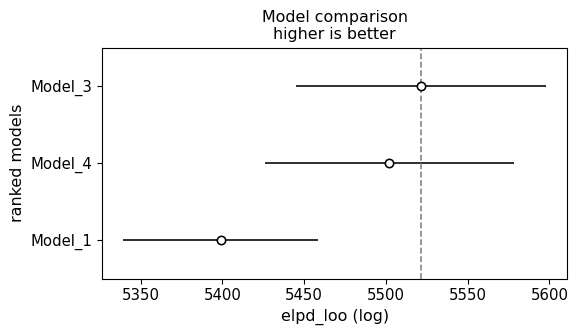

In [ ]:
comp = az.compare({
    "Model_1": idata1,
    #"Model_2": idata2,
    "Model_3": idata3,
    "Model_4": idata4
})
print(comp)
az.plot_compare(comp)

In [ ]:
# The best model is model_3 so we use this in order to do covariate selection

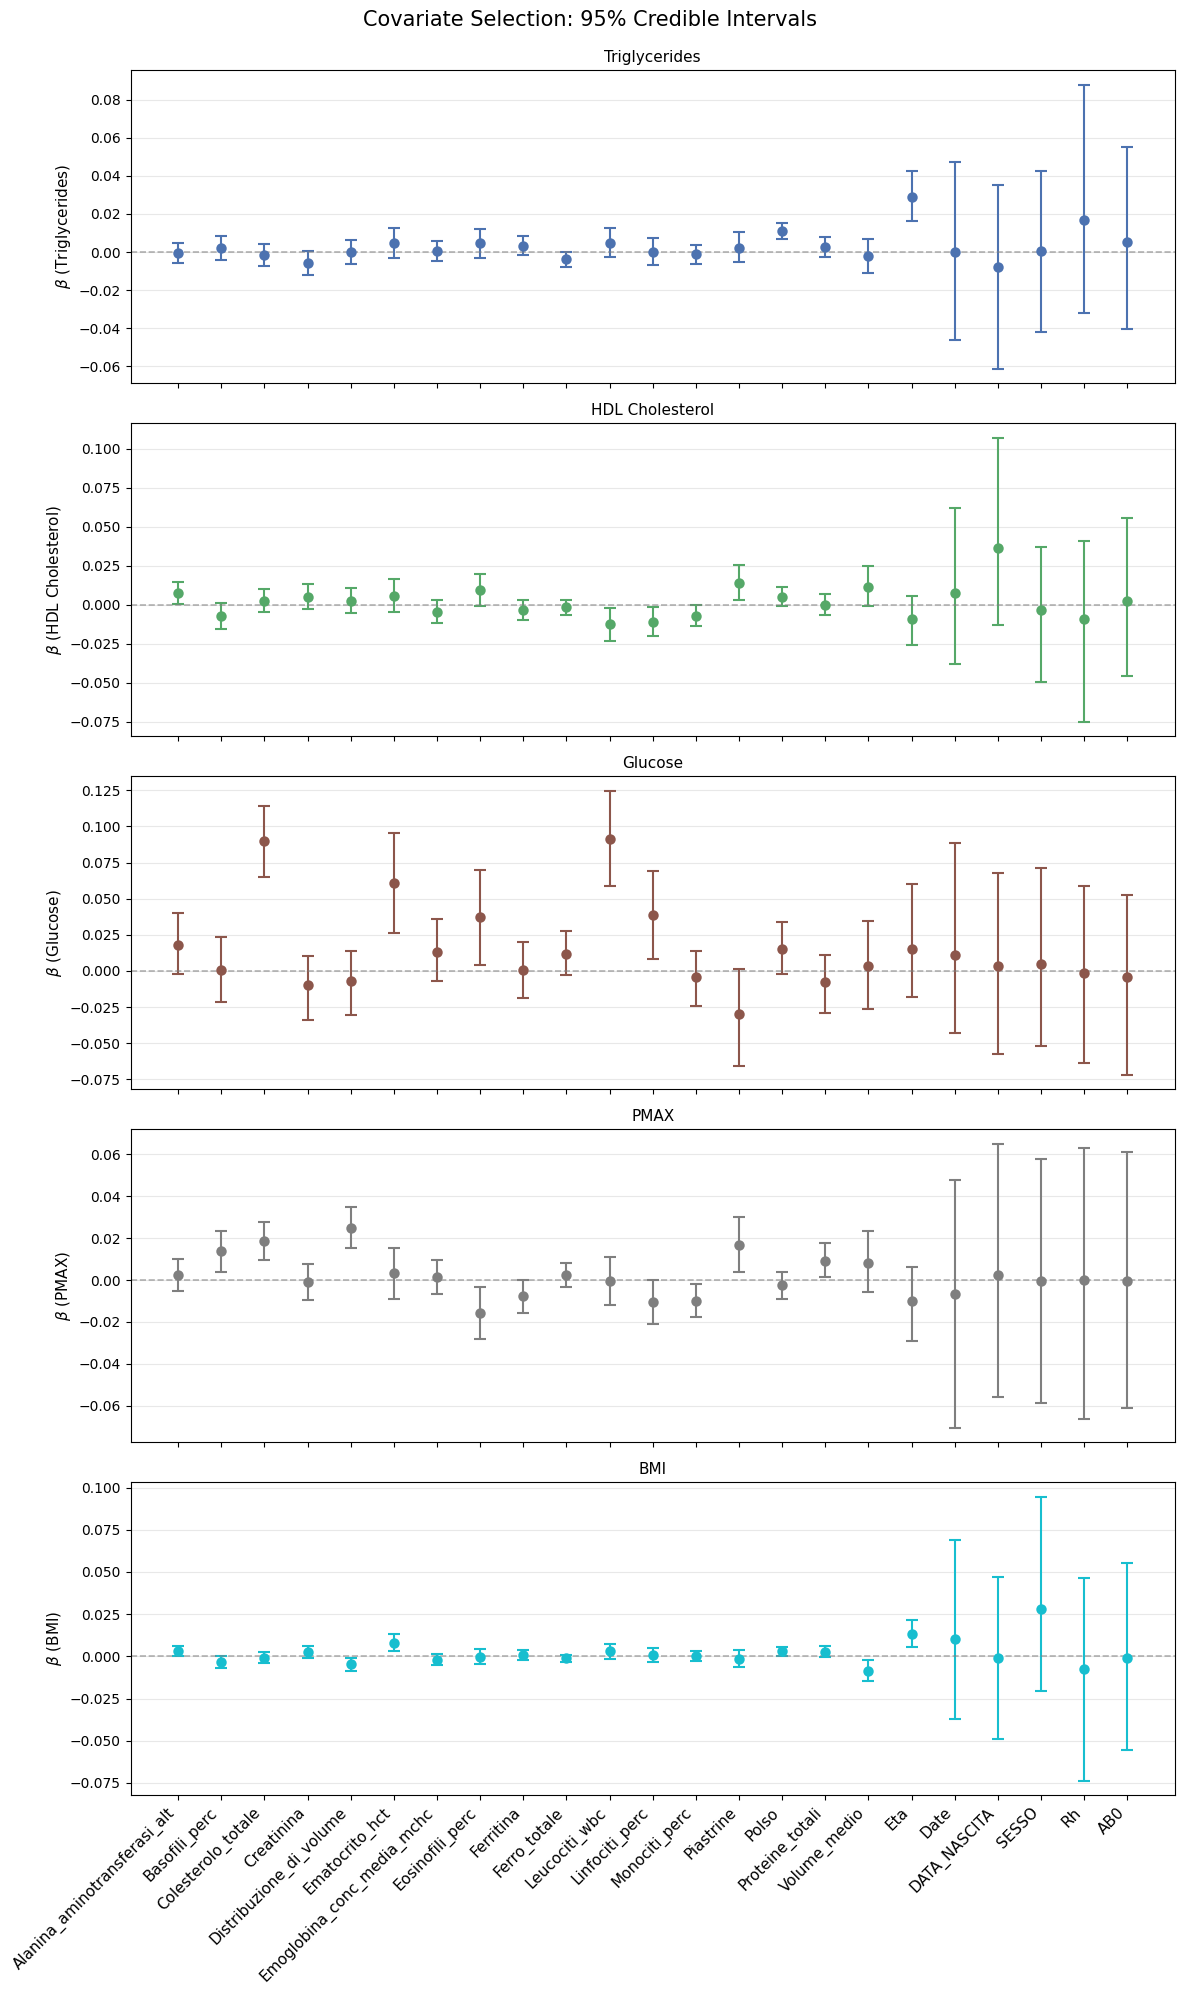

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ID_COL = "CAI"
TARGET_COLS = ["Trigliceridi", "Colesterolo_Hdl", "Glucosio", "PMAX", "BMI"]

COVARIATE_COLS = [c for c in df.columns if c not in TARGET_COLS + [ID_COL]]

fit = model_3
data = fit.stan_variables()
beta_samples = data['beta']

if beta_samples.ndim == 3 and beta_samples.shape[-1] == 5:
    beta_samples = np.swapaxes(beta_samples, 1, 2)

n_targets = beta_samples.shape[1]
n_features = beta_samples.shape[2]

if len(COVARIATE_COLS) < n_features:
    diff = n_features - len(COVARIATE_COLS)
    for i in range(diff):
        COVARIATE_COLS.append(f"Intercept/Unknown_{i+1}")
elif len(COVARIATE_COLS) > n_features:
    COVARIATE_COLS = COVARIATE_COLS[:n_features]

means = np.mean(beta_samples, axis=0)
lower = np.percentile(beta_samples, 2.5, axis=0)
upper = np.percentile(beta_samples, 97.5, axis=0)

y_pos = np.arange(n_features)
target_names = ['Triglycerides', 'HDL Cholesterol', 'Glucose', 'PMAX', 'BMI']
colors = ['#4c72b0', '#55a868', '#8c564b', '#7f7f7f', '#17becf']

fig, axes = plt.subplots(nrows=n_targets, ncols=1,
                         figsize=(12, 4 * n_targets),
                         sharex=True)

if n_targets == 1: axes = [axes]

for i, ax in enumerate(axes):
    y_mean = means[i, :]
    y_low = lower[i, :]
    y_high = upper[i, :]
    y_err = [y_mean - y_low, y_high - y_mean]

    col = colors[i % len(colors)]
    ax.errorbar(x=y_pos, y=y_mean, yerr=y_err, fmt='o',
                markersize=6, capsize=4,
                color=col, ecolor=col,
                elinewidth=1.5, markeredgewidth=1.5)

    ax.axhline(y=0, color='gray', linestyle='--', linewidth=1.2, alpha=0.6)

    t_name = target_names[i] if i < len(target_names) else f"Target {i+1}"
    ax.set_title(t_name, fontsize=11)
    ax.set_ylabel(fr'$\beta$ ({t_name})', fontsize=11)
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)

axes[-1].set_xticks(y_pos)
axes[-1].set_xticklabels(COVARIATE_COLS, rotation=45, ha='right', fontsize=11)

fig.suptitle('Covariate Selection: 95% Credible Intervals', fontsize=15, y=0.995)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimat

           rank     elpd_loo       p_loo  elpd_diff        weight         se  \
Modello 7     0  5517.958127  251.970684   0.000000  6.639723e-01  75.696440   
Modello 6     1  5517.265821  254.971445   0.692307  3.360277e-01  75.720192   
Modello 5     2  5515.973349  256.867972   1.984778  6.661338e-16  75.690648   

                dse  warning scale  
Modello 7  0.000000     True   log  
Modello 6  2.054150     True   log  
Modello 5  2.083728     True   log  


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

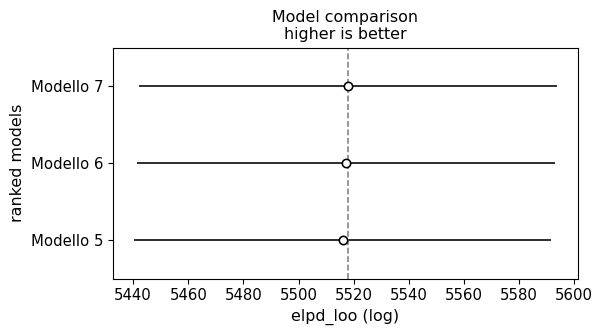

In [ ]:
comp = az.compare({
    "Modello 5": idata5,
    "Modello 6": idata6,
    "Modello 7": idata7
})
print(comp)
az.plot_compare(comp)